In [1]:
import os

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('C:/Users/dssalpc/Downloads/RF_mobilehealth/revision_data/traindata_2020_afterCovid.csv')

In [3]:
train_data = train_data.dropna()

In [4]:
reviews = list(train_data['clean_review'])
sentiments = list(train_data['sentiment'])

In [5]:
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer = 'char',  sublinear_tf=True, ngram_range=(1,3), max_features=5000, encoding = "ISO-8859-1") 

#TF-IDF train data embedding
x_train = vectorizer.fit_transform(reviews)
y_train = np.array(sentiments)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_list = {'max_depth': [10, 20, 30, 40, 50],
'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

rf_model = RandomForestClassifier(random_state = 82)

forest = GridSearchCV(
        estimator=rf_model,
        param_grid = param_list,
        cv = 5,
        n_jobs = -1,
        scoring = 'accuracy',
        verbose = 2)

forest.fit(x_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=82), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='accuracy', verbose=2)

In [7]:
print("Accuracy: %f" % forest.score(x_train, y_train))  # 트레이닝 셋으로 정확도 측정

Accuracy: 0.979344


In [8]:
#검증데이터셋 성능 평가
test_data = pd.read_csv('C:/Users/dssalpc/Downloads/RF_mobilehealth/revision_data/testdata_2021_afterCovid.csv')
test_data = test_data.dropna()

test_reviews = list(test_data['clean_review'])

In [9]:
#TF-IDF test data embedding
test_data_features = vectorizer.transform(test_reviews)
test_input = test_data_features

realAnswer = list(test_data['sentiment'])
test_label = np.array(realAnswer)

In [10]:
rf_pred = forest.predict(test_input)

In [11]:
print("Accuracy: %f" % accuracy_score(test_label, rf_pred))

Accuracy: 0.858052


Text(0.5, 257.44, 'Predicted label')

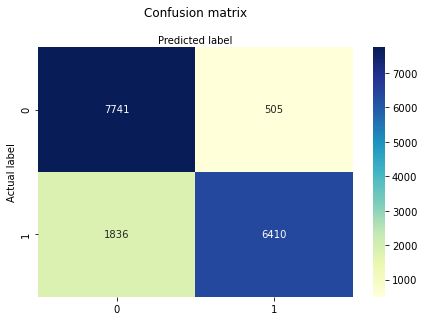

In [12]:
cnf_matrix = metrics.confusion_matrix(test_label, rf_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
print("Accuracy:",metrics.accuracy_score(test_label, rf_pred))
print("Precision:",metrics.precision_score(test_label, rf_pred))
print("Recall:",metrics.recall_score(test_label, rf_pred))

Accuracy: 0.8580523890371089
Precision: 0.9269703543022415
Recall: 0.7773465922871695


In [14]:
import joblib 

# 모델 저장
joblib.dump(forest, 'C:/Users/dssalpc/Downloads/RF_mobilehealth/rf_tfidf_with_gridsearch_afterCovid.pkl')

# 모델 불러오기
rf_model = joblib.load('C:/Users/dssalpc/Downloads/RF_mobilehealth/rf_tfidf_with_gridsearch_afterCovid.pkl')

In [15]:
rf_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=82), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='accuracy', verbose=2)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf_model.predict(test_input)
predictions = [value for value in y_pred]

accuracy_score(test_label, predictions)

0.8580523890371089

In [17]:
from sklearn.metrics import classification_report

report = classification_report(test_label, y_pred, target_names=['class low', 'class high'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class low,0.808291,0.938758,0.868653,8246.000000
class high,0.926970,0.777347,0.845591,8246.000000
accuracy,0.858052,0.858052,0.858052,0.858052
macro avg,0.867631,0.858052,0.857122,16492.000000
weighted avg,0.867631,0.858052,0.857122,16492.000000


In [18]:
forest.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}